In [163]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [257]:
df = pd.read_csv('Data/EmotionCategoriesIntesnityRating_FLFirst_Z.csv')
emo_cols = ['Amus', 'Ange',
       'Awe_', 'Calm', 'Conf', 'Curi', 'Disa', 'Disg', 'Exci', 'Fear', 'Frus',
       'Happ', 'Inte', 'Joy_', 'Pain', 'Pity', 'Prou', 'Reli', 'Sad_', 'Surp']
df_cols_int = df[emo_cols]!=0
zeros_ones = df_cols_int.values*1#ratings to counts 
df[emo_cols]=zeros_ones
df.columns = ['Unnamed: 0', 'Random ID', 'Vid', 'video_watched','Amusement', 'Anger',#rename columns from abreviated to full emotions
       'Awe', 'Calm', 'Confused', 'Curious', 'Disappointment', 'Disgust', 'Excitement', 'Fear', 'Frustrated',
       'Happy', 'Interested', 'Joy', 'Pain', 'Pity', 'Proud', 'Relieved', 'Sad', 'Surprised']
emo_cols = ['Amusement', 'Anger',
                'Awe', 'Calm', 'Confused', 'Curious', 
                'Disappointment', 'Disgust', 'Excitement',
                'Fear', 'Frustrated',
                'Happy', 'Interested',
                'Joy', 'Pain', 'Pity', 'Proud', 
                'Relieved', 'Sad', 'Surprised']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [219]:
video_as_doc = df.groupby('video_watched')[emo_cols].sum()# get frequency counts

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'N Components')

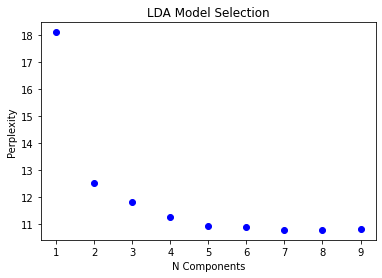

In [330]:
for i in range(1,10):
    lda = LatentDirichletAllocation(n_components=i,max_iter=500)
    lda.fit(video_as_doc)
    score = lda.perplexity(video_as_doc)
    plt.scatter(i,score,c='b')
plt.title('LDA Model Selection')
plt.ylabel('Perplexity')
plt.xlabel('N Components')

In [361]:
best_lda= LatentDirichletAllocation(n_components=5,max_iter=500)
best_lda = best_lda.fit(video_as_doc)
topic_df = pd.DataFrame(best_lda.components_ / 
                        best_lda.components_.sum(axis=1)[:, np.newaxis],columns=emo_cols)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


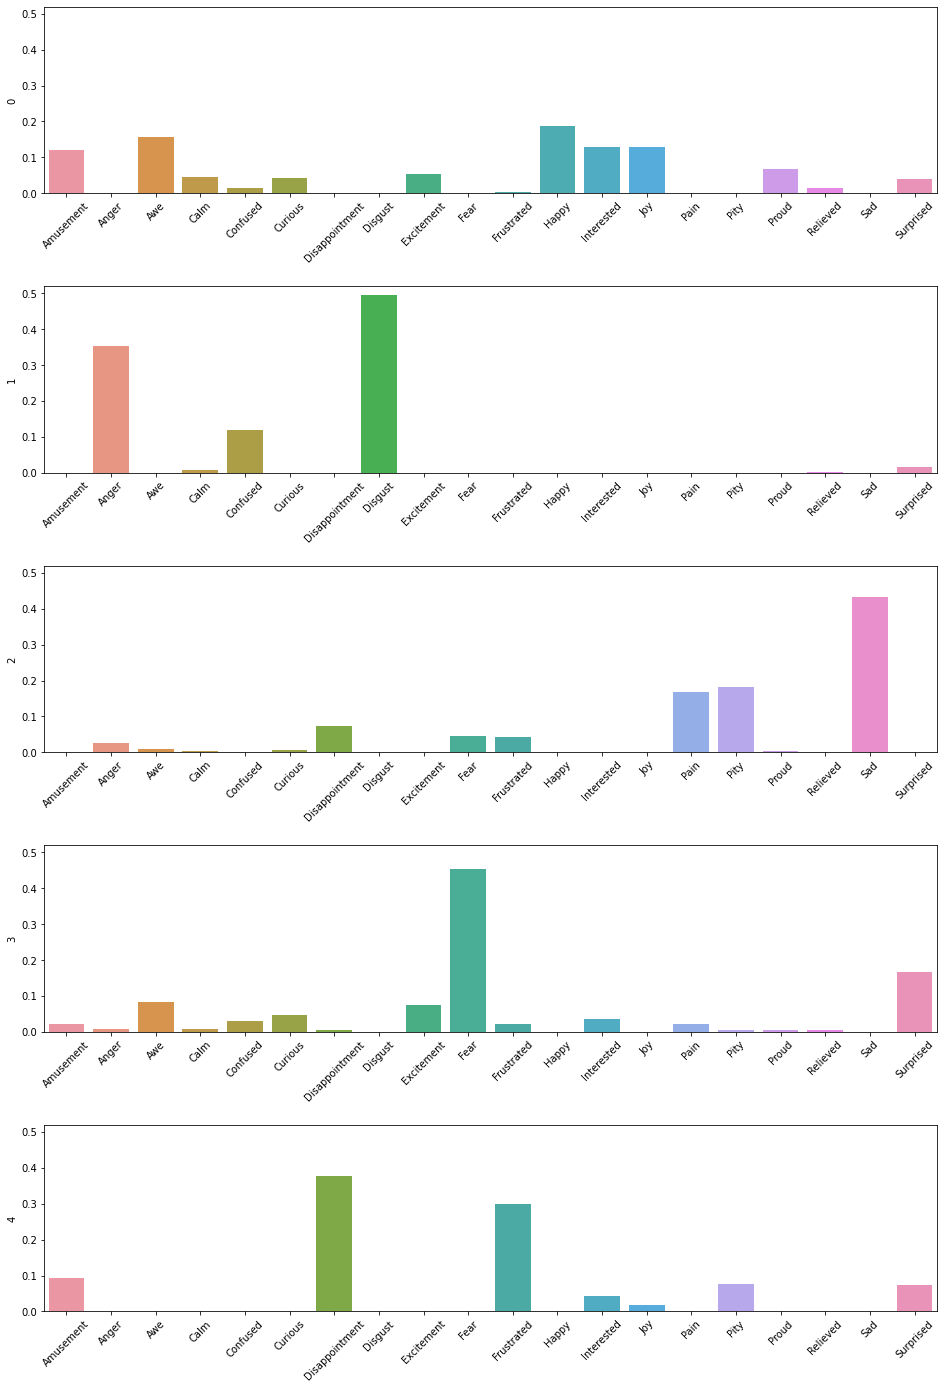

In [333]:
n_topics = len(topic_df)
fig,axes=plt.subplots(n_topics,1,figsize=((16,24)),sharey=True)
for i in range(n_topics):
    bar_plot = sns.barplot(x=topic_df.columns,y=topic_df.iloc[i,:],ax=axes[i],)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(45)
fig.subplots_adjust(hspace=.5)
plt.savefig('5_topics_lda',facecolor='white', transparent=False)

# Truncated SVD

In [345]:
vid_word_lists = []
#create strings with N frequency of emotion words based on count data
for idx,row in video_as_doc.iterrows():
    vid_word_list = []
    for emo, emo_count in list(zip(row.index,row.values)):
        vid_word_list = vid_word_list + [emo]*emo_count
    
    doc_text = ''
    for word in vid_word_list:
        doc_text = doc_text + ' ' + word
    vid_word_lists.append(doc_text)
#create tf_idf matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.05)
tf_idf = tfidf_vectorizer.fit_transform(vid_word_lists)   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<35x20 sparse matrix of type '<class 'numpy.float64'>'
	with 433 stored elements in Compressed Sparse Row format>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


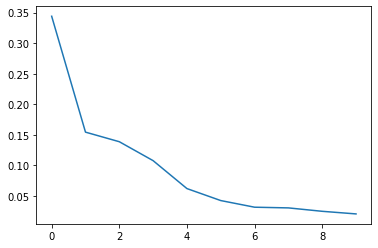

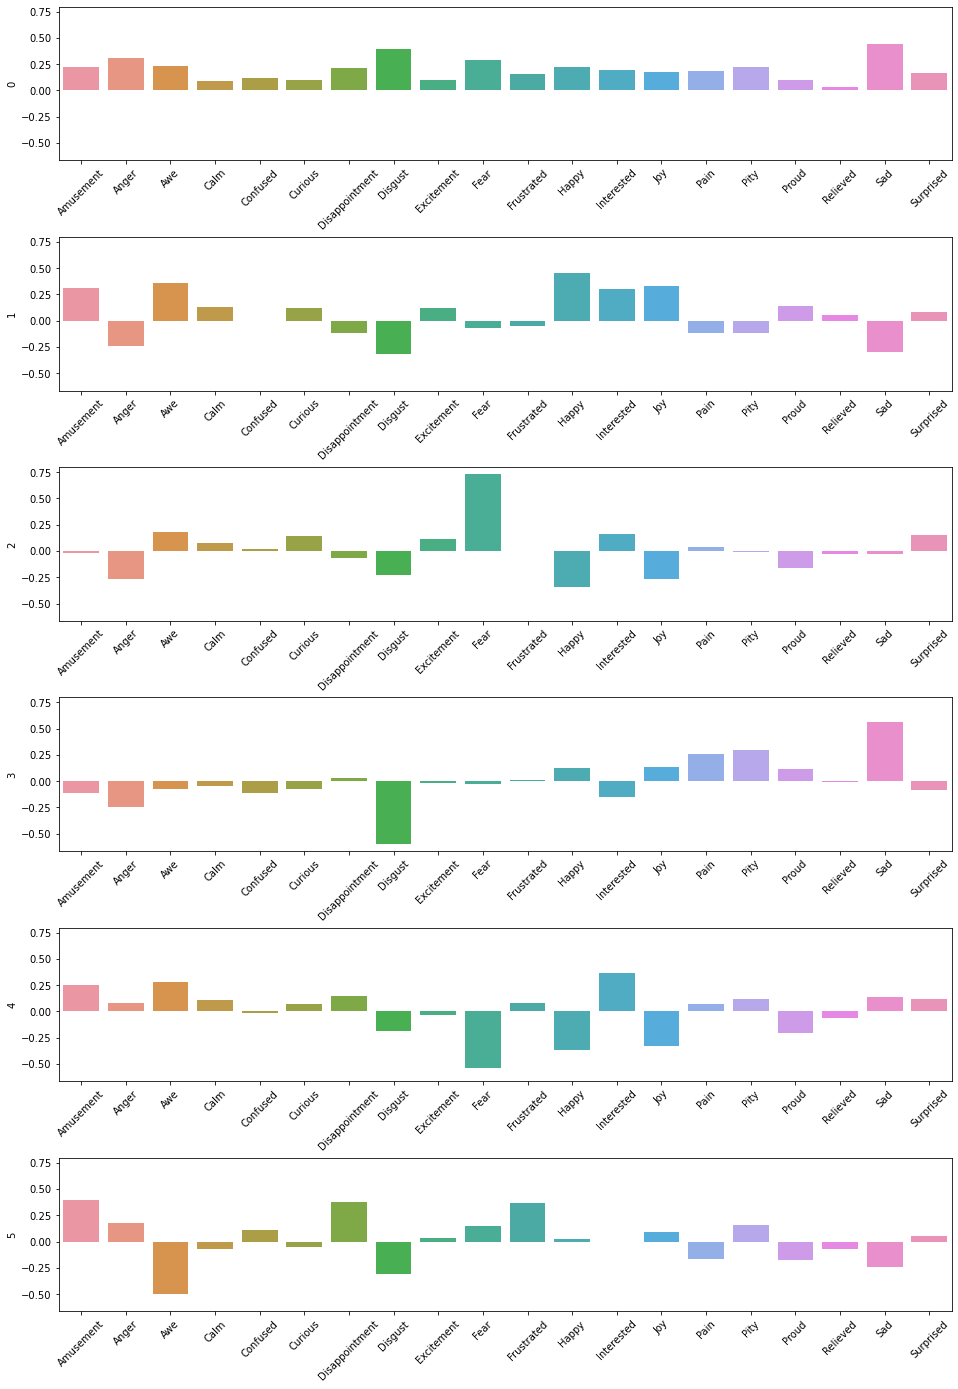

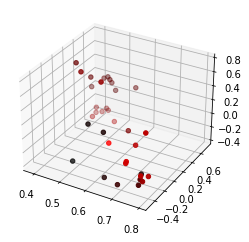

(array([5., 7., 5., 2., 1., 3., 1., 2., 3., 6.]),
 array([0.38711694, 0.42791728, 0.46871763, 0.50951797, 0.55031831,
        0.59111865, 0.63191899, 0.67271934, 0.71351968, 0.75432002,
        0.79512036]),
 <BarContainer object of 10 artists>)

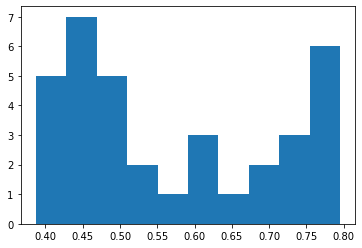

In [354]:
# RUN LSA
LSA = TruncatedSVD(n_components=10).fit(tf_idf)
plt.plot(np.sort(LSA.explained_variance_ratio_)[::-1])
plt.savefig('LSA_Curve',facecolor='white', transparent=False)
LSA_df = pd.DataFrame(LSA.components_,columns=emo_cols)
n_topics = 6#chosen after viewing graph
fig,axes=plt.subplots(n_topics,1,figsize=((16,24)),sharey=True)
#plot different components
for i in range(n_topics):
    bar_plot = sns.barplot(x=topic_df.columns,y=LSA_df.iloc[i,:],ax=axes[i],)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(45)
fig.subplots_adjust(hspace=.5)
plt.savefig('6_topics_LSA',facecolor='white', transparent=False)
plt.show()


In [359]:
vid_inLSA[:,:5]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.78104816, -0.4928939 , -0.2190124 , -0.23595945,  0.0046919 ],
       [ 0.78093819, -0.45958987, -0.16181411, -0.16929403, -0.01531479],
       [ 0.6981553 , -0.4647488 , -0.33295198, -0.33395637,  0.06633917],
       [ 0.63056108,  0.1057355 , -0.01595758,  0.01638018,  0.2252612 ],
       [ 0.74455296, -0.23712446, -0.28366919, -0.45866352,  0.12351301],
       [ 0.63770107, -0.40948309, -0.34121049, -0.4707339 ,  0.017163  ],
       [ 0.50831696, -0.37084012, -0.28387481, -0.62119872, -0.13803602],
       [ 0.47667057,  0.64946333,  0.07891823, -0.17317152,  0.35540761],
       [ 0.54231511,  0.73214688,  0.13533734, -0.12846027,  0.2046025 ],
       [ 0.4481021 ,  0.63610967,  0.2583824 , -0.19943536,  0.45166465],
       [ 0.45740259,  0.67071272,  0.16052904, -0.14185776,  0.32373883],
       [ 0.397413  ,  0.55674679,  0.10701318, -0.14879705,  0.30414004],
       [ 0.47447171,  0.54239015,  0.29724684, -0.15427988,  0.43236722],
       [ 0.43144498,  0.64047752,  0.2

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


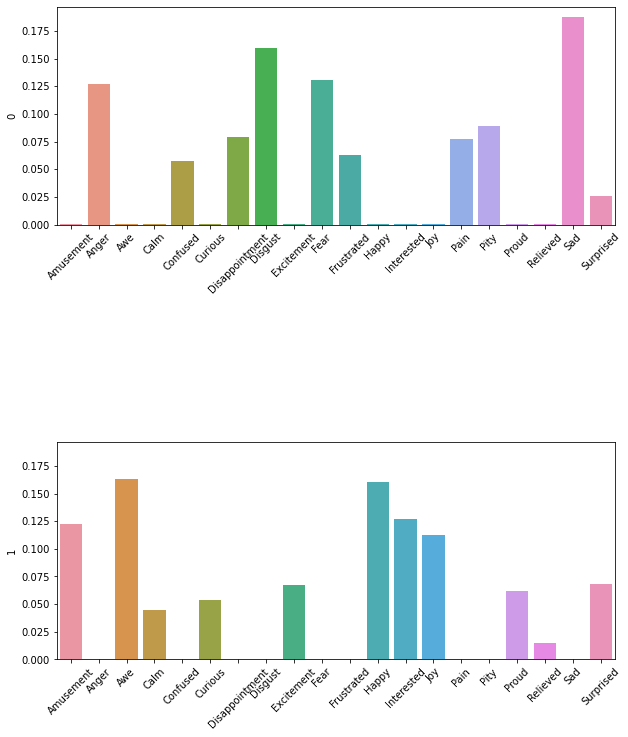

In [240]:
best_lda= LatentDirichletAllocation(n_components=2,max_iter=500)
best_lda = best_lda.fit(df[emo_cols])
topic_df = pd.DataFrame(best_lda.components_ / 
                        best_lda.components_.sum(axis=1)[:, np.newaxis],columns=emo_cols)
n_topics = len(topic_df)
fig,axes=plt.subplots(n_topics,1,figsize=((5*n_topics,12)),sharey=True)
for i in range(n_topics):
    bar_plot = sns.barplot(x=topic_df.columns,y=topic_df.iloc[i,:],ax=axes[i],)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(45)
fig.subplots_adjust(hspace=1)

# Gensim

In [58]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
vid_word_lists = []
for idx,row in video_as_doc.iterrows():
    vid_word_list = []
    for emo, emo_count in list(zip(row.index,row.values)):
        vid_word_list = vid_word_list + [emo]*emo_count
    vid_word_lists.append(vid_word_list)
id2word=corpora.Dictionary(vid_word_lists)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in vid_word_lists]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


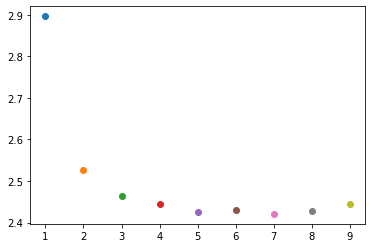

In [117]:
# Build LDA model
for i in range(1,10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=i, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    plt.scatter(i,lda_model.log_perplexity(corpus)*-1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


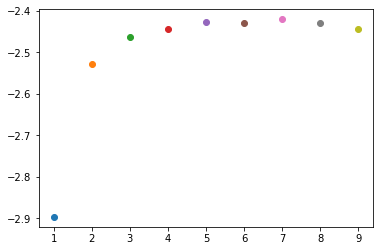

In [111]:
# Build LDA model
for i in range(1,10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=i, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    plt.scatter(i,lda_model.log_perplexity(corpus))

In [161]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=5, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
lda_model.get_topics()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.00033608, 0.20356458, 0.02509692, 0.0715235 , 0.00377843,
        0.00033149, 0.06351723, 0.01323181, 0.00632524, 0.1980373 ,
        0.00561056, 0.00036484, 0.00038058, 0.08613976, 0.15705839,
        0.0599759 , 0.02898306, 0.05724788, 0.01103341, 0.00746302],
       [0.04139797, 0.01678225, 0.04458388, 0.00228531, 0.16514318,
        0.00228017, 0.02099775, 0.0154994 , 0.1772832 , 0.03936842,
        0.00234508, 0.1358893 , 0.00231583, 0.10258452, 0.16606365,
        0.01051369, 0.03961676, 0.01002254, 0.00280437, 0.00222265],
       [0.25485477, 0.00299483, 0.07440296, 0.00808276, 0.10121892,
        0.32647473, 0.0036356 , 0.00273743, 0.0687229 , 0.00890089,
        0.01091041, 0.01205559, 0.08124068, 0.02299277, 0.00487757,
        0.0040809 , 0.00106749, 0.0068785 , 0.00051118, 0.0033592 ],
       [0.03456172, 0.01768135, 0.01962828, 0.01086937, 0.04507376,
        0.04739749, 0.01575996, 0.21055165, 0.03283617, 0.00586943,
        0.12015571, 0.12231715, 0.2581725 , 0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: object of type 'int' has no len()

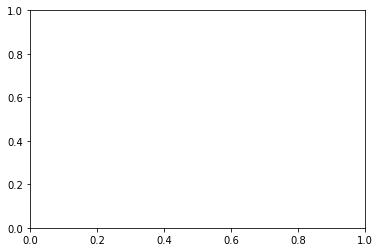

In [138]:
# Build LDA model
for i in range(1,10):
    lsi_model = gensim.models.lsimodel.LsiModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=5) 
                                        
    

In [141]:
lsi_model = gensim.models.lsimodel.LsiModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=5) 


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [147]:
lsi_model.print_topics(num_topics=5, num_words=10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '-0.567*"Sad_" + -0.429*"Disg" + -0.381*"Ange" + -0.258*"Fear" + -0.249*"Pity" + -0.234*"Pain" + -0.220*"Disa" + -0.154*"Frus" + -0.134*"Awe_" + -0.122*"Surp"'),
 (1,
  '0.564*"Happ" + 0.407*"Awe_" + 0.399*"Joy_" + 0.329*"Amus" + 0.293*"Inte" + 0.179*"Prou" + -0.160*"Sad_" + -0.146*"Disg" + 0.145*"Exci" + -0.142*"Ange"'),
 (2,
  '-0.515*"Sad_" + 0.487*"Disg" + 0.442*"Fear" + -0.266*"Pity" + -0.237*"Pain" + 0.219*"Surp" + -0.165*"Happ" + -0.148*"Joy_" + 0.133*"Ange" + 0.126*"Inte"'),
 (3,
  '0.613*"Fear" + -0.432*"Ange" + -0.366*"Disg" + -0.254*"Happ" + 0.206*"Sad_" + 0.206*"Awe_" + -0.190*"Joy_" + 0.168*"Pain" + 0.147*"Surp" + 0.133*"Pity"'),
 (4,
  '-0.487*"Inte" + 0.464*"Fear" + 0.363*"Happ" + -0.327*"Awe_" + 0.324*"Joy_" + -0.268*"Amus" + 0.184*"Prou" + -0.157*"Ange" + -0.134*"Curi" + 0.125*"Disg"')]

In [327]:
par_1045_ratings = df.loc[df['Random ID']==9453][emo_cols]
par_1045_ratings
df

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Random ID,Vid,video_watched,Amusement,Anger,Awe,Calm,Confused,Curious,...,Frustrated,Happy,Interested,Joy,Pain,Pity,Proud,Relieved,Sad,Surprised
0,0,1045,"Anger,Disappointed,Fear",Anger1.1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1045,"Anger,Disgust",Anger2.2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1045,"Anger,Disgust,Frustrated",Anger3.3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,1045,Amused,Anger4.4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1045,"Anger,Disgust",Anger5.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1780,9453,"Pain,Sad",Sad3.3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1254,1781,9453,"Pain,Sad",Sad4.4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1255,1782,9453,"Disappointed,Pain",Sad5.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1256,1783,9453,Disappointed,Sad6.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'N Components')

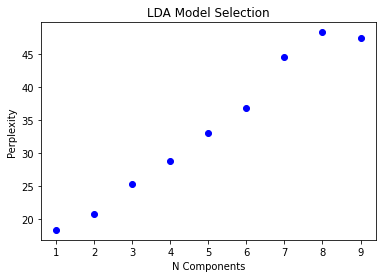

In [328]:
for i in range(1,10):
    lda = LatentDirichletAllocation(n_components=i,max_iter=500)
    lda.fit(par_1045_ratings)
    #print(lda.perplexity(video_as_doc))
    score = lda.perplexity(par_1045_ratings)
    plt.scatter(i,score,c='b')
plt.title('LDA Model Selection')
plt.ylabel('Perplexity')
plt.xlabel('N Components')

In [325]:
lda = LatentDirichletAllocation(n_components=2,max_iter=8)
lda.fit(par_1045_ratings)
lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.00848073, 0.12039822, 0.10583674, 0.020992  , 0.00718445,
        0.00718445, 0.08863084, 0.13434712, 0.03535008, 0.15464352,
        0.02269289, 0.00711193, 0.13440365, 0.00720718, 0.00711193,
        0.01246186, 0.00717687, 0.00718309, 0.07715924, 0.03444319],
       [0.18456982, 0.01543363, 0.01611775, 0.01510769, 0.04308616,
        0.04308616, 0.02216029, 0.0159908 , 0.01483574, 0.032508  ,
        0.09812735, 0.01441103, 0.01587626, 0.1295063 , 0.01441103,
        0.14768072, 0.10074565, 0.04308892, 0.01658331, 0.01667338]])

In [329]:
par_1045_ratings

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Amusement,Anger,Awe,Calm,Confused,Curious,Disappointment,Disgust,Excitement,Fear,Frustrated,Happy,Interested,Joy,Pain,Pity,Proud,Relieved,Sad,Surprised
1223,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1224,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1225,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1226,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1227,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1229,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1230,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1231,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
